# Matplotlib and pylab inline

In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [70]:
import cv2 as cv
import numpy as np

from modules.standardization import *
from modules.mask_and_contour import get_mask
from modules.reading import *
from matplotlib import rcParams

rcParams["figure.dpi"] = 100
rcParams["figure.figsize"] = (4, 5)
rcParams["image.cmap"] = "gray"

## Read image 

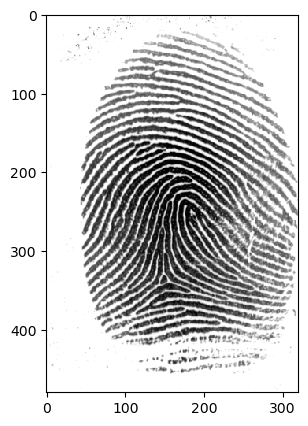

In [29]:
im = read_random_image(RAW_FILE_PATH_SCANS)

plt.imshow(im)
pass

## Inverse color

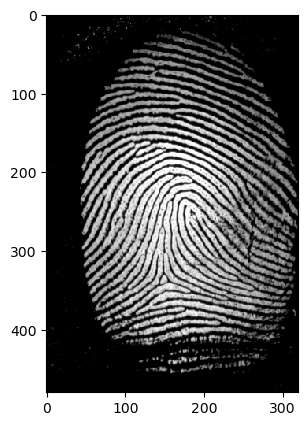

In [30]:
inv_im = invers_color(im)

plt.imshow(inv_im)
pass

## Get mask

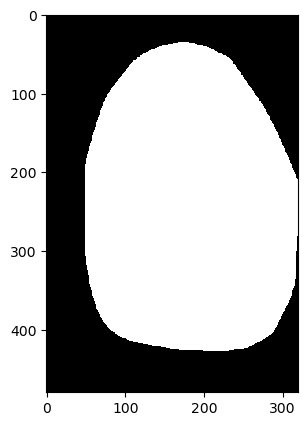

In [31]:
mask = get_mask(inv_im, p1=0.45) == 255

plt.imshow(mask)

In [37]:
# Clear noise 

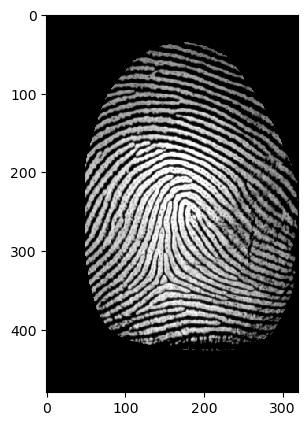

In [38]:
inv_im[mask==False] = 0

plt.imshow(inv_im)
pass

# Crop and resize image

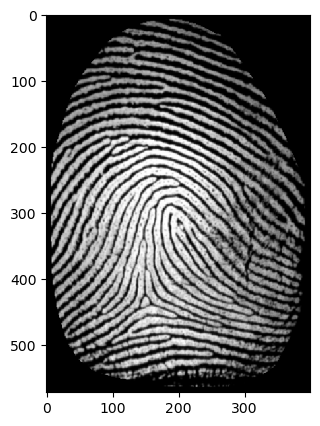

In [42]:
crop_im = crop_fp_image(inv_im)
resized_im = resize_fp_image(crop_im)

plt.imshow(resized_im)

## merge function

In [80]:
def standardize_image(im, bound_const=5,new_width=400,interpolation=cv.INTER_LINEAR,
                      with_golden_ratio=True, with_ench=True, ker_ksize=20, p0=0.1, p1=.45):
    
    inv_im = invers_color(im)
    if with_ench:
        mask = get_mask(inv_im, ker_ksize=ker_ksize, p0=p0, p1=p1) == 255
        inv_im[mask==False] = 0
    
    crop_im = crop_fp_image(inv_im)
    resized_im = resize_fp_image(crop_im)
    
    return resized_im

## Test function

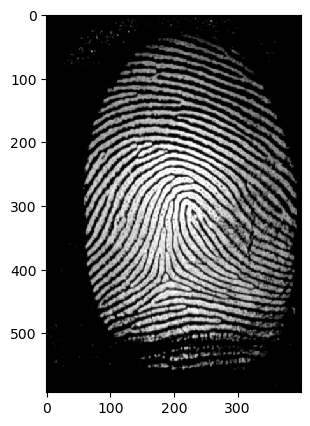

In [83]:
im = read_random_image(RAW_FILE_PATH_SCANS)
std_im = standardize_image(im)

plt.imshow(std_im)
pass